In [1]:
%matplotlib inline
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

In [12]:
nnbars = glob('/Volumes/TimeMachine/data/eboss/v4/results/clustering/nnbar_*.npy')
nnbars, nnbars[0]

(['/Volumes/TimeMachine/data/eboss/v4/results/clustering/nnbar_lin.npy',
  '/Volumes/TimeMachine/data/eboss/v4/results/clustering/nnbar_nnr-ab.npy',
  '/Volumes/TimeMachine/data/eboss/v4/results/clustering/nnbar_nnr.npy',
  '/Volumes/TimeMachine/data/eboss/v4/results/clustering/nnbar_nns.npy',
  '/Volumes/TimeMachine/data/eboss/v4/results/clustering/nnbar_quad.npy',
  '/Volumes/TimeMachine/data/eboss/v4/results/clustering/nnbar_uni.npy'],
 'lin')

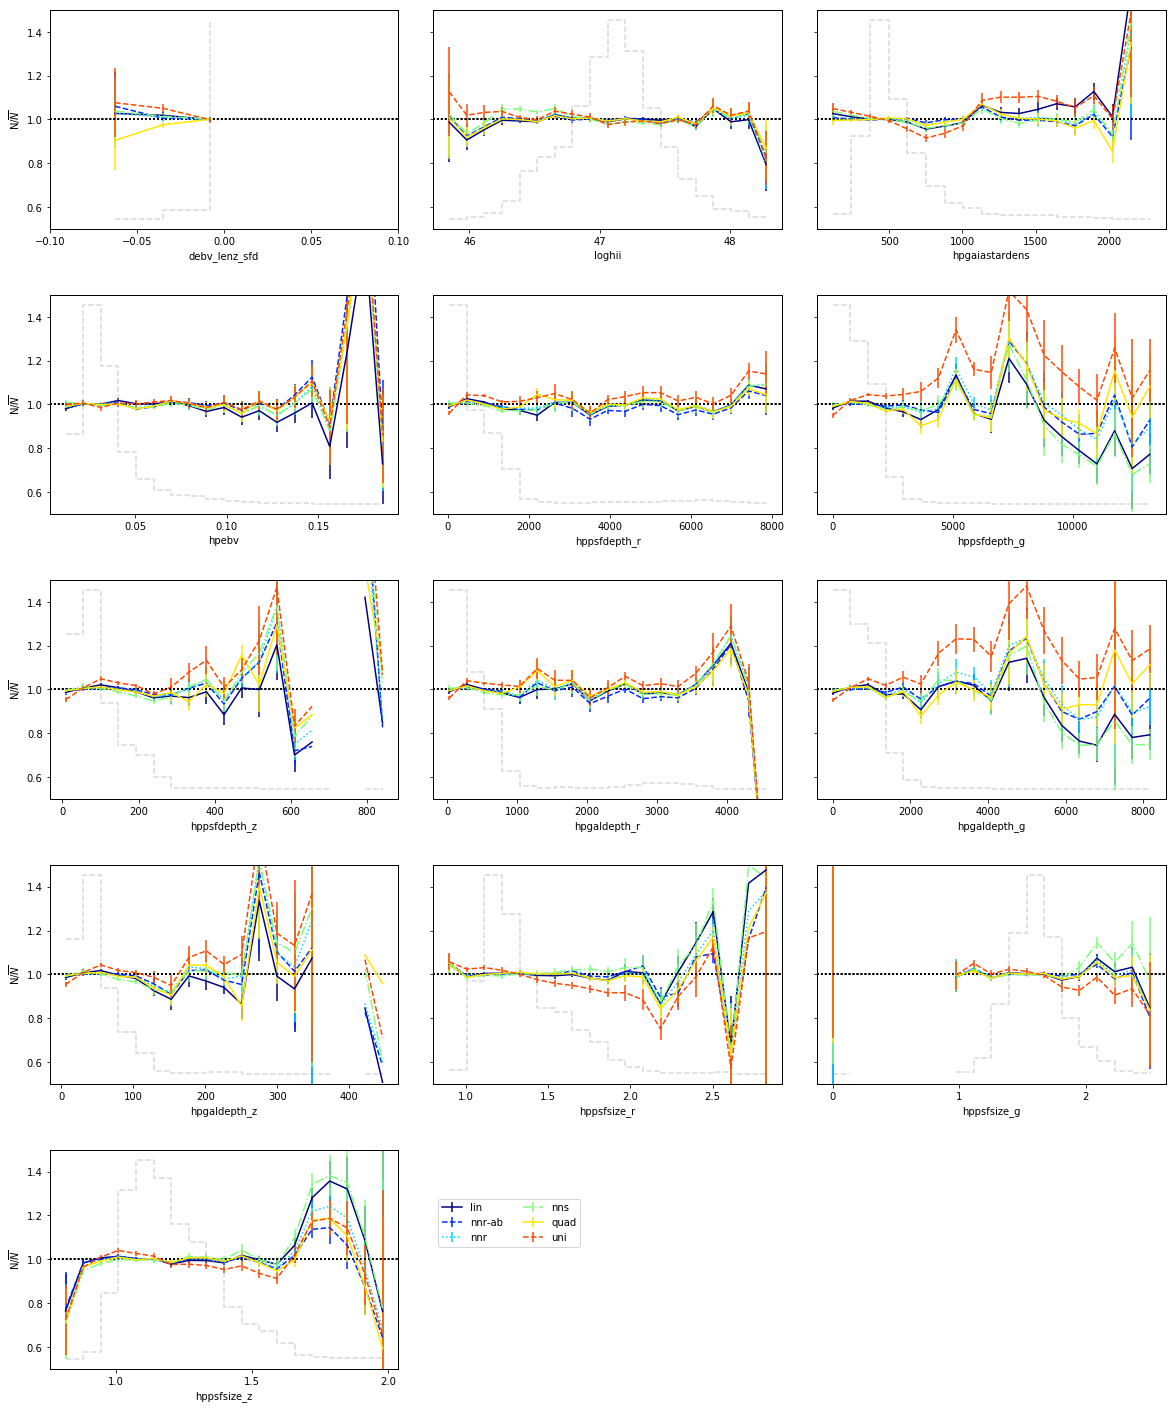

In [47]:
fig, ax = plt.subplots(ncols=3, nrows=5, sharey=True, figsize=(20, 25)) # 10, 16.5
plt.subplots_adjust(wspace=0.1, hspace=0.3)
ax = ax.flatten()
fig.delaxes(ax[-1])
fig.delaxes(ax[-2])
def add_ax(ax, res, shift=1.0, step=True, **kw):
    ax.errorbar(res['bin_edges'][:-1]*shift, res['nnbar'],
                  yerr=res['nnbar_err'], **kw)
    ax.axhline(1, linestyle=':', color='k')
    ax2 = ax.twinx()
    ax2.set_yticks([])
    #ax2.fill_between(res['bin_edges'][:-1], 0, res['area'], step='post',
    #                 linestyle='--', color='grey', alpha=0.1)
    if step:ax2.step(res['bin_edges'][:-1], res['area'], where='post',
                     linestyle='--', color='grey', alpha=0.3)


def loop_ax(ax, d):
    ls = 2*['-','--',':', '-.']
    m  = len(d)
    c  = plt.cm.jet
    for i,df in enumerate(d):
        ttl = df.split('/')[-1].split('_')[1].split('.')[0]
        di = np.load(df).item()
        for j in range(len(di['xlabels'])):
            if i ==0:
                step=True
            else:
                step=False
            add_ax(ax[j], di['nnbar'][j], color=c(i/m), ls=ls[i], label=ttl, step=step)
            if i==0:
                if j%3 == 0:ax[j].set_ylabel(r'N/$\overline{N}$')
                ax[j].set_xlabel(di['xlabels'][j])
                ax[j].set_ylim(0.5, 1.5)
                ax[j].locator_params(tight=True, nbins=5)
    ax[12].legend(bbox_to_anchor=(1.1, 0.8), ncol=2)
    
ax[0].set_xlim(-0.1, 0.1)
loop_ax(ax, nnbars)

Clustering of each chunk

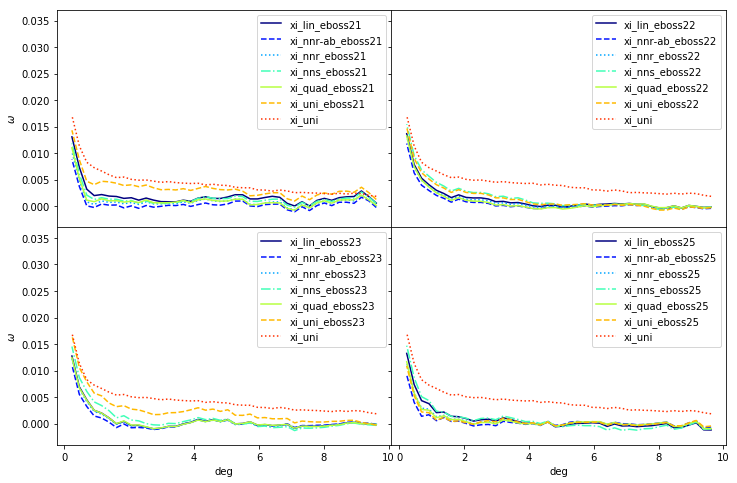

In [18]:
ls = 2*['-','--',':', '-.']
m  = len(xis)
c  = plt.cm.jet
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 8),
                       sharey=True, sharex=True)
plt.subplots_adjust(hspace=0, wspace=0)
ax = ax.flatten()

for j,lb in enumerate([1, 2, 3, 5]):
    eboss = 'eboss2'+str(lb)
    xis = glob('/Volumes/TimeMachine/data/eboss/v4/results/clustering/xi_*'+eboss+'*.npy')
    xis.append('/Volumes/TimeMachine/data/eboss/v4/results/clustering/xi_uni_nside_256_njack_0.npy') # all
    for i,xi in enumerate(xis):
        ltt = xi.split('/')[-1].split('nside')[0][:-1]
        d   = np.load(xi).item()
        #print(d.keys())
        t   = np.degrees(d['t'][1:])
        w   = d['w'][0]/d['w'][1]
        ax[j].plot(t, w, color=c(i/m), label=ltt, ls=ls[i])
    ax[j].legend()
    ax[j].set_ylim(-0.004, 0.037)    
    if j%2==0:ax[j].set_ylabel(r'$\omega$')
    if j>1:ax[j].set_xlabel('deg')
# plt.title('using ELG_hpsyst.nside256.fits')

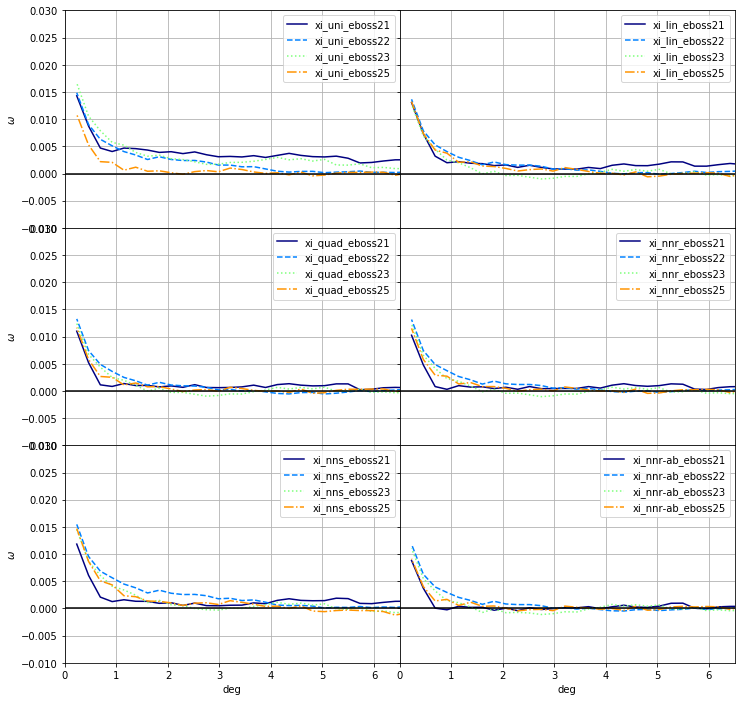

In [36]:
ls = 2*['-','--',':', '-.']

c  = plt.cm.jet
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 12),
                       sharey=True, sharex=True)
plt.subplots_adjust(hspace=0, wspace=0)
ax = ax.flatten()

for j,lb in enumerate(['uni', 'lin', 'quad', 'nnr', 'nns', 'nnr-ab']):
    xis = glob('/Volumes/TimeMachine/data/eboss/v4/results/clustering/xi_'+lb+'_eboss*.npy')
    #xis.append('/Volumes/TimeMachine/data/eboss/v4/results/clustering/xi_uni_nside_256_njack_0.npy') # all
    m  = len(xis)    
    for i,xi in enumerate(xis):
        ltt = xi.split('/')[-1].split('nside')[0][:-1]
        d   = np.load(xi).item()
        #print(d.keys())
        t   = np.degrees(d['t'][1:])
        w   = d['w'][0]/d['w'][1]
        ax[j].plot(t, w, color=c(i/m), label=ltt, ls=ls[i])
    ax[j].legend()
    ax[j].grid()
    ax[j].axhline(0, color='k', linestyle='-')
    ax[j].set_xlim(0, 6.5)    
    ax[j].set_ylim(-0.010, 0.030)    
    if j%2==0:ax[j].set_ylabel(r'$\omega$')
    if j>3:ax[j].set_xlabel('deg')
# plt.title('using ELG_hpsyst.nside256.fits')

In [24]:
xis = glob('/Volumes/TimeMachine/data/eboss/v4/results/clustering/xi_*.npy')
xis, xis[0]

(['/Volumes/TimeMachine/data/eboss/v4/results/clustering/xi_lin_nside_256_njack_0.npy',
  '/Volumes/TimeMachine/data/eboss/v4/results/clustering/xi_nnr-ab_nside_256_njack_0.npy',
  '/Volumes/TimeMachine/data/eboss/v4/results/clustering/xi_nnr_nside_256_njack_0.npy',
  '/Volumes/TimeMachine/data/eboss/v4/results/clustering/xi_nns_nside_256_njack_0.npy',
  '/Volumes/TimeMachine/data/eboss/v4/results/clustering/xi_quad_nside_256_njack_0.npy',
  '/Volumes/TimeMachine/data/eboss/v4/results/clustering/xi_uni_nside_256_njack_0.npy'],
 '/Volumes/TimeMachine/data/eboss/v4/results/clustering/xi_lin_nside_256_njack_0.npy')

In [25]:
xis[0].split('/')[-1].split('_')[1].split('.')[0]

'lin'

Text(0.5,1,'using ELG_hpsyst.nside256.fits')

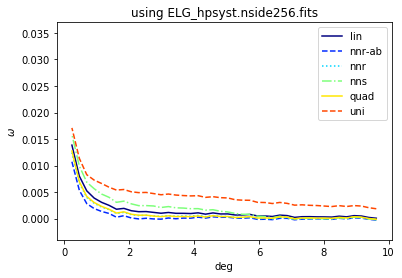

In [31]:
ls = 2*['-','--',':', '-.']
m  = len(xis)
c  = plt.cm.jet
plt.figure(figsize=(6, 4))
for i,xi in enumerate(xis):
    ltt = xi.split('/')[-1].split('_')[1].split('.')[0]
    d   = np.load(xi).item()
    #print(d.keys())
    t   = np.degrees(d['t'][1:])
    w   = d['w'][0]/d['w'][1]
    plt.plot(t, w, color=c(i/m), label=ltt, ls=ls[i])
plt.legend()
plt.xlabel('deg')
plt.ylabel(r'$\omega$')
plt.ylim(-0.004, 0.037)
plt.title('using ELG_hpsyst.nside256.fits')

In [49]:
clt = np.loadtxt('/Volumes/TimeMachine/data/mocks/fftlog.out', usecols=(1))

In [32]:
cls = glob('/Volumes/TimeMachine/data/eboss/v4/results/clustering/cl_*.npy')
cls, cls[0]

(['/Volumes/TimeMachine/data/eboss/v4/results/clustering/cl_lin.npy',
  '/Volumes/TimeMachine/data/eboss/v4/results/clustering/cl_nnr-ab.npy',
  '/Volumes/TimeMachine/data/eboss/v4/results/clustering/cl_nnr.npy',
  '/Volumes/TimeMachine/data/eboss/v4/results/clustering/cl_nns.npy',
  '/Volumes/TimeMachine/data/eboss/v4/results/clustering/cl_quad.npy',
  '/Volumes/TimeMachine/data/eboss/v4/results/clustering/cl_uni.npy'],
 '/Volumes/TimeMachine/data/eboss/v4/results/clustering/cl_lin.npy')

Text(0.5,1,'using ELG_hpsyst.nside256.fits')

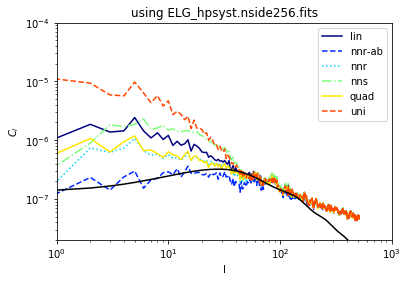

In [52]:
ls = 2*['-','--',':', '-.']
m  = len(xis)
c  = plt.cm.jet
plt.figure(figsize=(6, 4))
for i,xi in enumerate(cls):
    ltt = xi.split('/')[-1].split('_')[1].split('.')[0]
    d   = np.load(xi).item()
    #print(d.keys())
    t   = np.arange(d['auto'].size)
    w   = d['auto']
    plt.plot(t, w, color=c(i/m), label=ltt, ls=ls[i])
plt.plot(np.arange(1, clt.size+1), 0.1*clt, 'k-')
plt.legend()
plt.xlabel('l')
plt.ylabel(r'$C_{l}$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(2.e-8, 1.e-4)
plt.xlim(1, 1000)
plt.title('using ELG_hpsyst.nside256.fits')

In [1]:
import healpy as hp
%matplotlib inline
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('/Users/rezaie/github/DESILSS')

In [3]:
from tools import makedelta, hpix2radec

camb is not installed!


In [4]:
ngal = hp.read_map('/Volumes/TimeMachine/data/eboss/v4/ELG.hp256.fits')
mask = hp.read_map('/Volumes/TimeMachine/data/eboss/v4/mask_eboss22.hp256.fits').astype('bool')
frac = hp.read_map('/Volumes/TimeMachine/data/eboss/v4/fracgood.hp256.fits')
linw = hp.read_map('/Volumes/TimeMachine/data/eboss/v4/results/regression/mult-all/lin-weights.hp256.fits')
nnw  = hp.read_map('/Volumes/TimeMachine/data/eboss/v4/results/regression/nn/nn-r-ab/nn-weights.hp256.fits')

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [24]:
nnbar  = makedelta(ngal, weight1=frac, mask=mask) + 1.0
linw   = linw / np.mean(linw[mask])
nnw    = nnw / np.mean(nnw[mask])

# nnw[~mask] = np.mean(nnw[mask])
# nnw = hp.smoothing(nnw.copy(), sigma=np.deg2rad(0.1))
nnbarc = makedelta(ngal, weight1=frac, mask=mask, select_fun=nnw) + 1.0

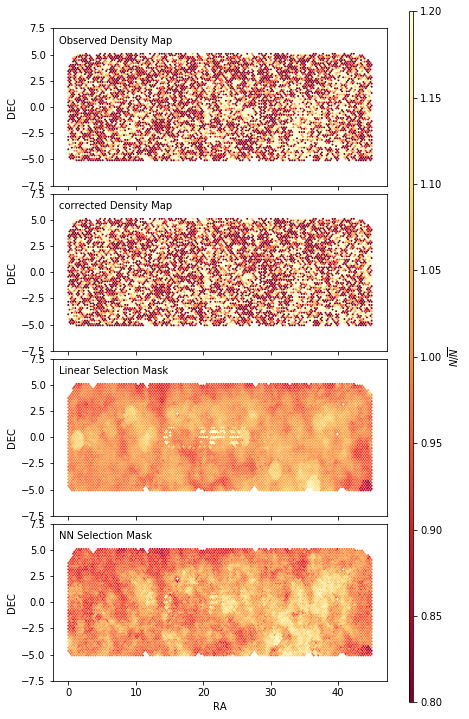

In [25]:
# plt.rc('axes.spines', top=False, right=False)
# plt.rc('font', family='serif')
# plt.rc('text', usetex=True)
hpix = np.argwhere(mask).flatten()
fig, ax = plt.subplots(nrows=4, figsize=(6, 12), sharex=True)
plt.subplots_adjust(hspace=0.05)


#ttl = ['No weights', 'Linear weights', 'NN weights']
ttl = ['Observed Density Map', 'corrected Density Map', 'Linear Selection Mask','NN Selection Mask', ]
#for i,di in enumerate([duni, dlin, dnn]):
for i,di in enumerate([nnbar, nnbarc, linw, nnw]):
    radec = hpix2radec(256, hpix)
    map1 = ax[i].scatter(radec[0], radec[1], 1.0, 
                         #c=5*di[mask], vmin=-1, vmax=1.,
                        c=di[mask], vmin=0.8, vmax=1.2,
                        cmap=plt.cm.YlOrRd_r)
    ax[i].text(0.02, 0.9, ttl[i], transform=ax[i].transAxes)
    ax[-1].set_xlabel('RA')
    ax[i].set_ylabel('DEC')
    ax[i].set_ylim(-7.5, 7.5)
    #ax[i].axis([200, 310, 0, 20])
cax = plt.axes([.95, 0.1, 0.01, 0.8])
fig.colorbar(map1, cax=cax, label=r'$N/\overline{N}$')
# plt.savefig('./deltas.png', bbox_inches='tight', dpi=300)

In [6]:
import fitsio as ft
nnW = ft.read('/Volumes/TimeMachine/data/eboss/v4/results/regression/nn/nn-r-ab/nn-weights256.fits')

Text(0,0.5,'Npix')

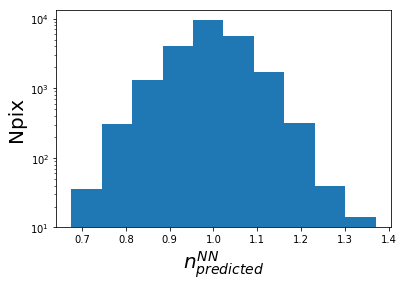

In [12]:
plt.hist(nnW['weight'])
plt.yscale('log')
plt.xlabel(r'$n_{predicted}^{NN}$', fontsize=20)
plt.ylabel('Npix', fontsize=20)

In [14]:
radec = hpix2radec(256, nnW['hpix'])

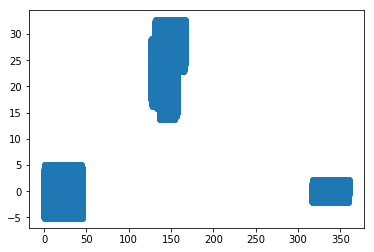

In [15]:
plt.scatter(*radec)